In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']='SimHei'
from sklearn.model_selection import train_test_split #随机划分为训练子集和测试子集
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.preprocessing import StandardScaler #标准化处理
from sklearn import preprocessing as pp #数据预处理

In [90]:
data1=pd.read_csv('/Users/yezhibin/Downloads/比赛/天池短租/listings.csv',index_col=0)

In [91]:
data1.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [92]:
print("data1.shape",data1.shape)
data1.info() #异常值检测

data1.shape (28452, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28452 entries, 44054 to 33954414
Data columns (total 15 columns):
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dtypes: float64(4), int64(

In [93]:
data1["room_type"].value_counts() #单独查看房屋类型有哪几种

Entire home/apt    16955
Private room        9838
Shared room         1659
Name: room_type, dtype: int64

In [94]:
data1.describe().T #数据的描述性情况了解

,count,mean,std,min,25%,50%,75%,max
host_id,28452.0,1.442821e+08,7.057051e+07,192875.00000,8.708958e+07,1.525464e+08,2.061464e+08,2.563498e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,28452.0,3.998323e+01,1.869841e-01,39.45581,3.989733e+01,3.993090e+01,3.999047e+01,4.094966e+01
longitude,28452.0,1.164420e+02,2.047957e-01,115.47339,1.163553e+02,1.164347e+02,1.164911e+02,1.174953e+02
price,28452.0,6.112033e+02,1.623535e+03,0.00000,2.350000e+02,3.890000e+02,5.770000e+02,6.898300e+04
minimum_nights,28452.0,2.729685e+00,1.792093e+01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.125000e+03
number_of_reviews,28452.0,7.103156e+00,1.681507e+01,0.00000,0.000000e+00,1.000000e+00,6.000000e+00,3.220000e+02
reviews_per_month,17294.0,1.319757e+00,1.581243e+00,0.01000,2.900000e-01,8.000000e-01,1.750000e+00,2.000000e+01
calculated_host_listings_count,28452.0,1.281829e+01,2.926132e+01,1.00000,2.000000e+00,5.000000e+00,1.100000e+01,2.220000e+02
availability_365,28452.0,2.203421e+02,1.384307e+02,0.00000,8.700000e+01,2.090000e+02,3.610000e+02,3.650000e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a275e66d8>,
      dtype=object)

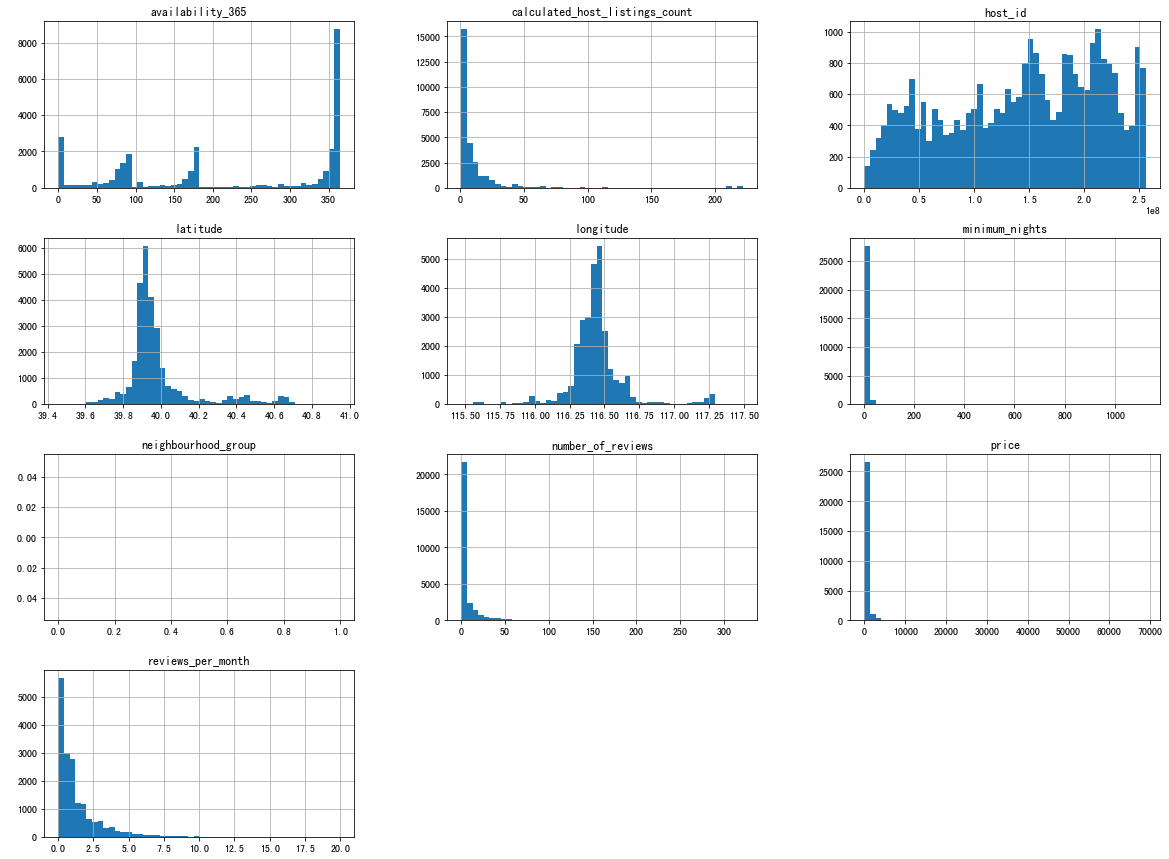

In [95]:
# data1.hist(bins=50, figsize(20,15))
# plt.show()
#import matplotlib.pyplot as plt
data1.hist(bins=50, figsize=(20,15)) #bins指bin(箱子)的个数，即每张图柱子的个数

In [96]:
#数据预处理

In [97]:
data2=data1.copy()
data2=data2.drop("neighbourhood_group",axis=1) #drop默认删除行，列需要添加axis=1
data2.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [98]:
data2[data2['name'].isnull()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
7775603,NaN,14820763,张三,房山区,39.79932,116.21361,Shared room,9998,1,0,NaN,NaN,1,364


In [99]:
#data2=data2[~data2['host_id'].isin([14820763])]
data2=data2[-data2['name'].isnull()]

#如果想要把name中的空值用其他值代替的话
# values={'name':'李四'}
# data2=data2.fillna(value=values)
# data2[data2['name'].isnull()]

In [100]:
data2.shape

(28451, 14)

In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28452 entries, 44054 to 33954414
Data columns (total 15 columns):
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usa

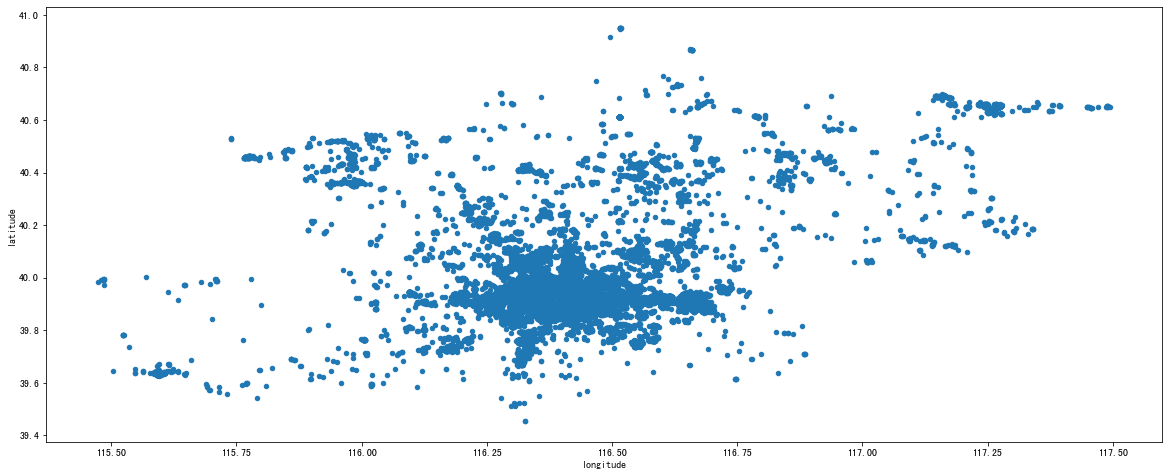

In [105]:
# 由于存在经纬度的数据，那么可以建立一个地图分布式的数据可视化
data2.plot(kind='scatter',x='longitude',y='latitude',figsize=(20,8))


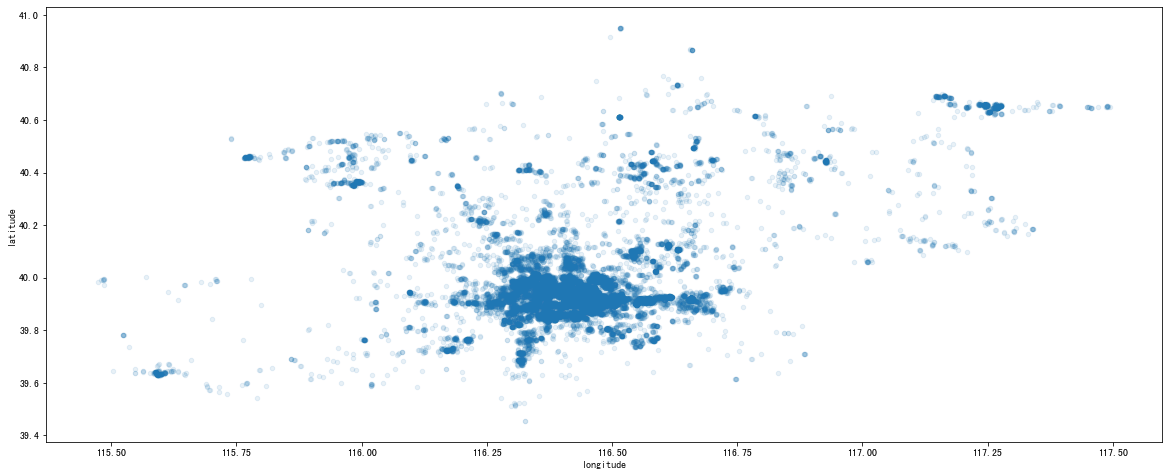

In [106]:
#调整下透明度

data2.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(20,8))


In [111]:
#逻辑回归——相关性分析
corr_matrix=data2.corr(method='pearson')
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
latitude                          0.126714
availability_365                  0.026738
host_id                           0.019636
longitude                         0.009705
minimum_nights                    0.008444
calculated_host_listings_count   -0.015670
number_of_reviews                -0.044324
reviews_per_month                -0.046072
Name: price, dtype: float64

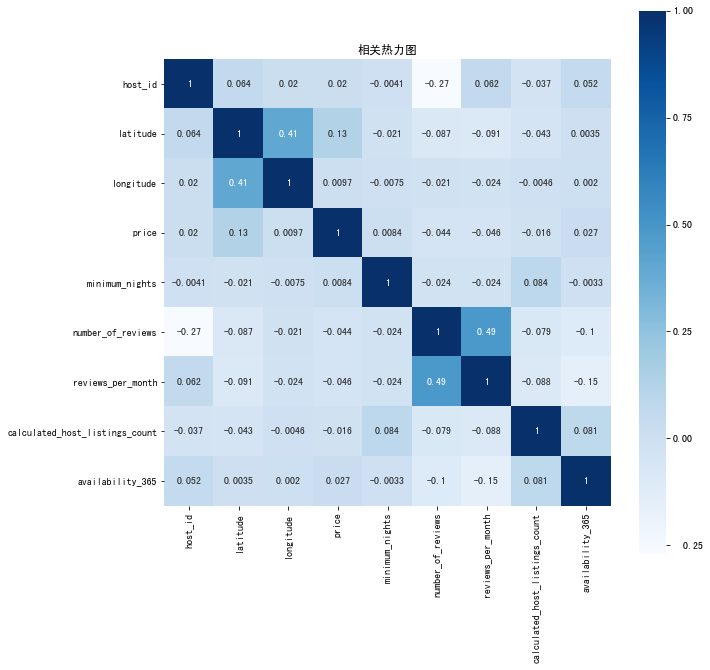

In [114]:
#绘制热力图
#https://blog.csdn.net/ztf312/article/details/102474190 这边有seaborn中各个参数的具体含义的解释
plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,vmax=1,square=True,cmap="Blues")
plt.title('相关热力图')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27a1ec88>,
      dtype=object)

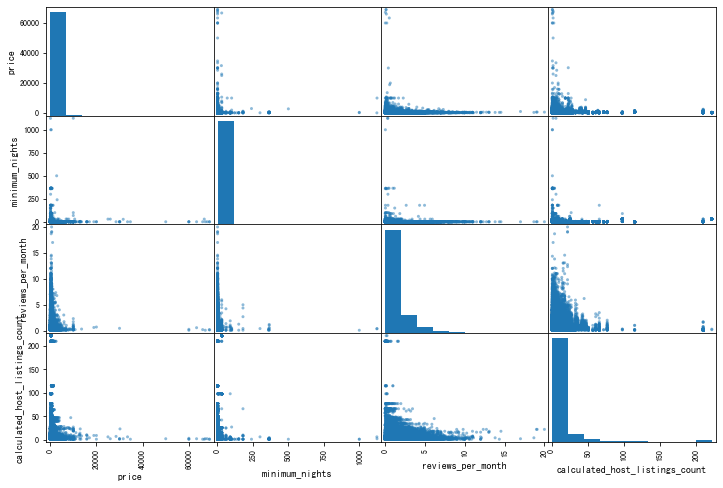

In [118]:
#这个可视化图，其实我不太明白作者做这个的意义，可能就是为了好看吧！

from pandas.plotting import scatter_matrix
attributes=['price','minimum_nights','reviews_per_month','calculated_host_listings_count']
scatter_matrix(data2[attributes],figsize=(12,8))

In [119]:
#单个特征分析

In [120]:
subsets=["neighbourhood","room_type","price","number_of_reviews","calculated_host_listings_count","availability_365"]
data3=data2[subsets]
data3.head()

,neighbourhood,room_type,price,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,
44054,朝阳区 / Chaoyang,Entire home/apt,792,89,9,341
100213,密云县 / Miyun,Private room,1201,2,4,0
128496,东城区,Entire home/apt,389,259,1,93
161902,东城区,Entire home/apt,376,26,5,290
162144,朝阳区 / Chaoyang,Entire home/apt,537,37,5,352


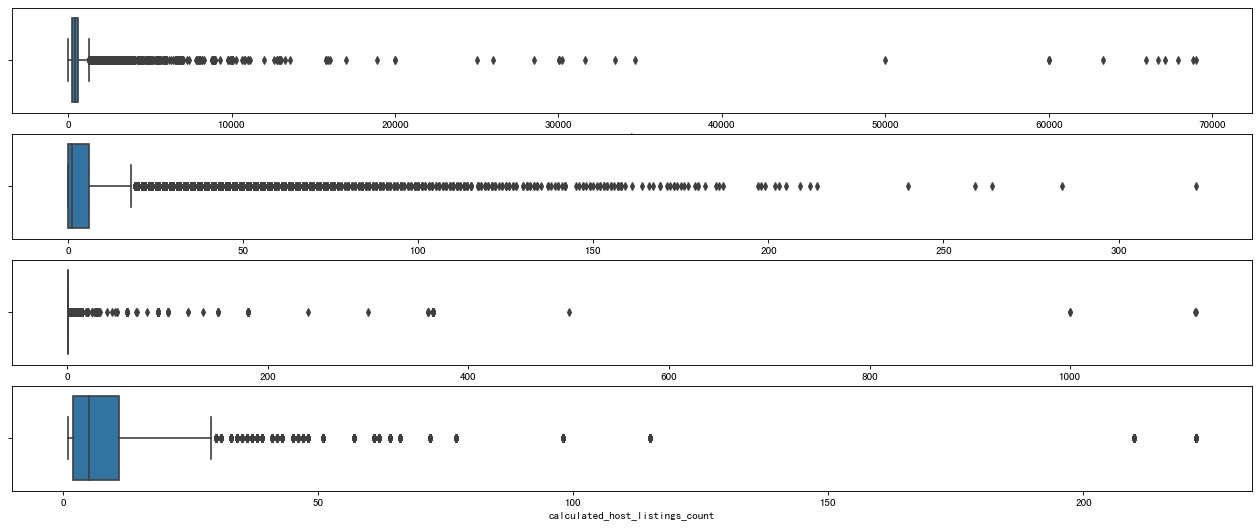

In [122]:
#关于sns的箱线图的参数含义以及简单案例，可以参考简书的这篇文章：https://www.jianshu.com/p/96977b9869ac
#本案例则是用一个函数让各个特征值逐个展现出来。如果
test_subsets=["price","number_of_reviews","minimum_nights","calculated_host_listings_count"]
fig,ax=plt.subplots(len(test_subsets),1,figsize=(20,8),dpi=80)
for i,test_subset in enumerate(test_subsets):
    sns.boxplot(data2[test_subset],ax=ax[i],whis=2,orient="h")
    

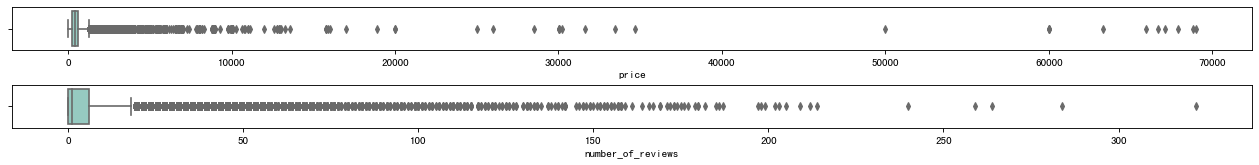

In [167]:
#如果不会上面的循环写法，拆解一个个写的话就是这种，也是没有问题的
# fig,axes=plt.subplots(2,1,figsize=(20,2),dpi=80)
# plt.subplots_adjust(hspace = 0.8)
# sns.boxplot(data2["price"],orient="h",palette="Set3",ax=axes[0],whis=2,color='red') 
# sns.boxplot(data2["number_of_reviews"],orient="h",ax=axes[1],palette="Set3",whis=2) 



                 number_of_reviews       price
room_type                                     
Entire home/apt           6.873371  746.479151
Private room              7.610083  430.681236
Shared room               6.449337  293.343185


count               28451
unique                  3
top       Entire home/apt
freq                16955
Name: room_type, dtype: object

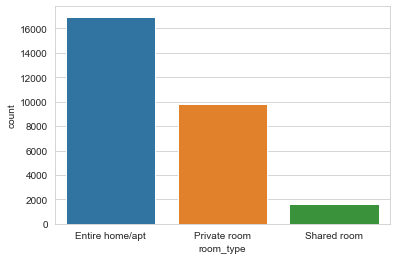

In [168]:
#对房间类型进行分析
sns.set_style("whitegrid")
sns.countplot(x='room_type',data=data2)
room=pd.pivot_table(data3,index='room_type',values=['price','number_of_reviews'])
print(room)

data3['room_type'].describe().T

In [173]:
#对房东类型进行分析——有运营多套的存在

data2["calculated_host_listings_count"].describe()
host_name=data2[["host_name","name"]].groupby("host_name").count().sort_values(by="name",ascending=False)
host_name.head()

,name
host_name,
美婷,223
兴伟,210
Cathy,116
海梅,115
李,112


Text(0.5, 1.0, '民宿分布区域占比图')

<Figure size 3600x1440 with 0 Axes>

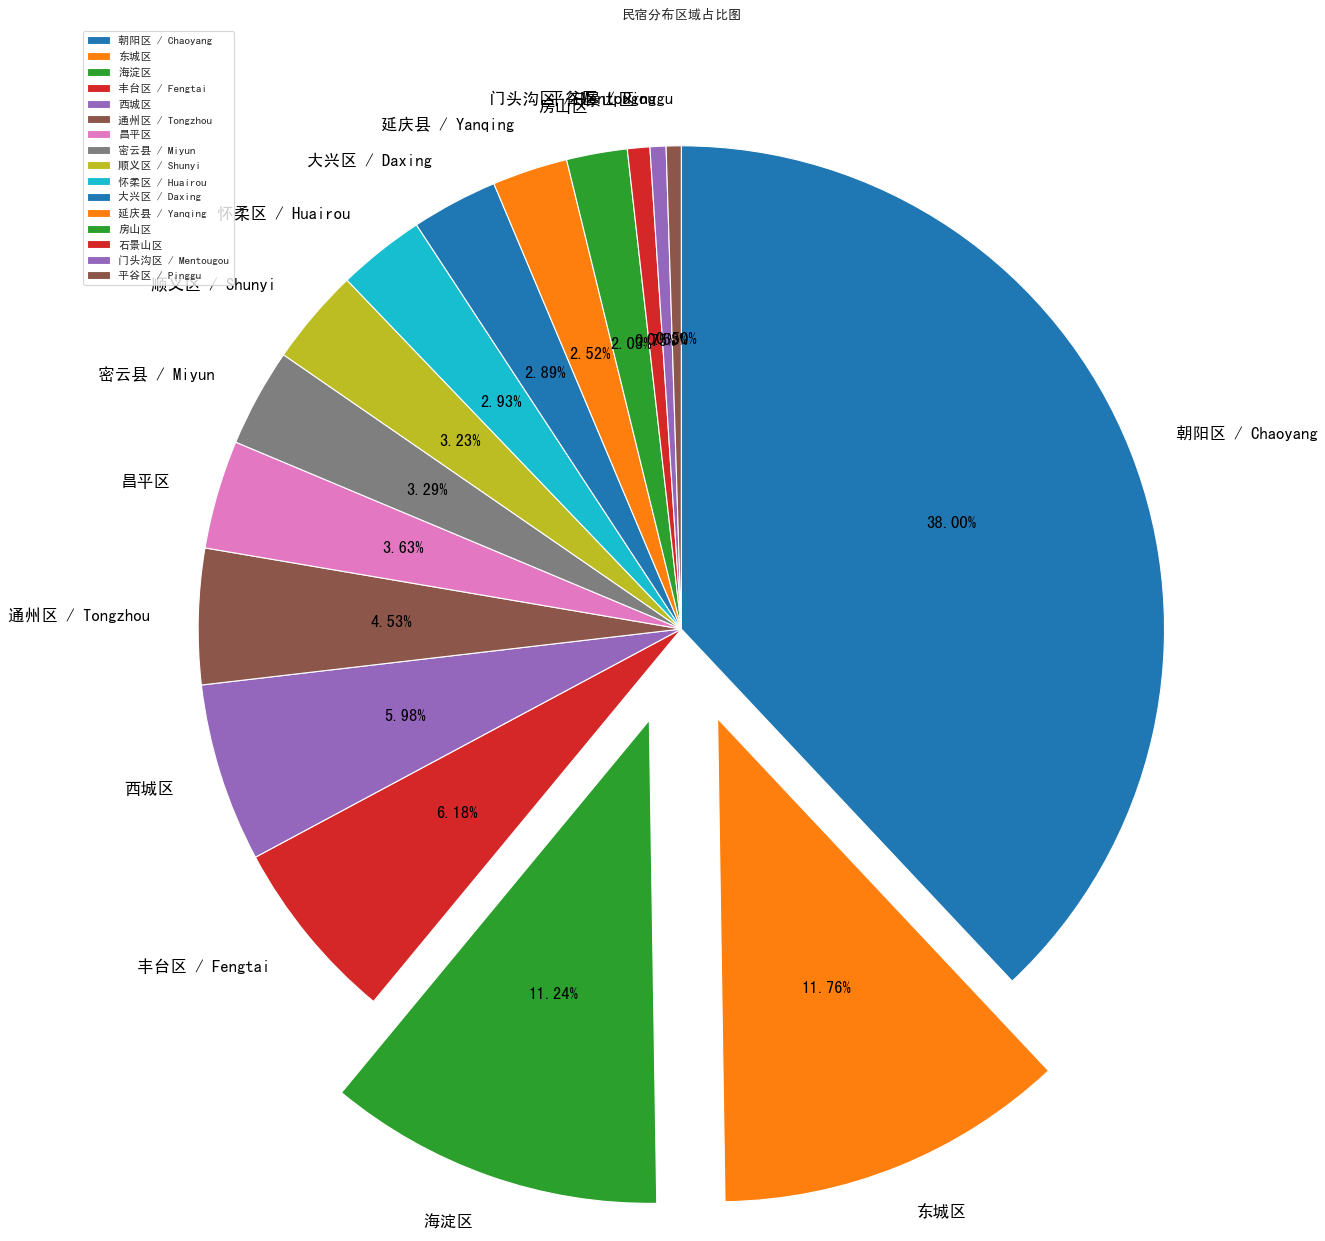

In [181]:
#绘制饼图查看房型的集中区域

plt.rcParams['font.sans-serif']='SimHei'  #用来显示中文标签
plt.figure(figsize=(50,20))
label=data2.neighbourhood.value_counts().index
explode={}
for i in label:
    if i in ["东城区","朝阳区","海淀区"]:
        explode[i]=0.2
    else:
        explode[i]=0

neighbourhood_data=data2['neighbourhood'].value_counts()
plt.figure(figsize=(20,20),dpi=80)
plt.pie(neighbourhood_data,labels=label,explode=explode.values(),autopct='%.2f%%',textprops={'fontsize':15,'color':'black'},
       startangle=90,counterclock=False)
plt.legend(loc='best')
plt.title('民宿分布区域占比图')



([<matplotlib.axis.XTick at 0x1a2b6b29e8>,
 <a list of 16 Text xticklabel objects>)

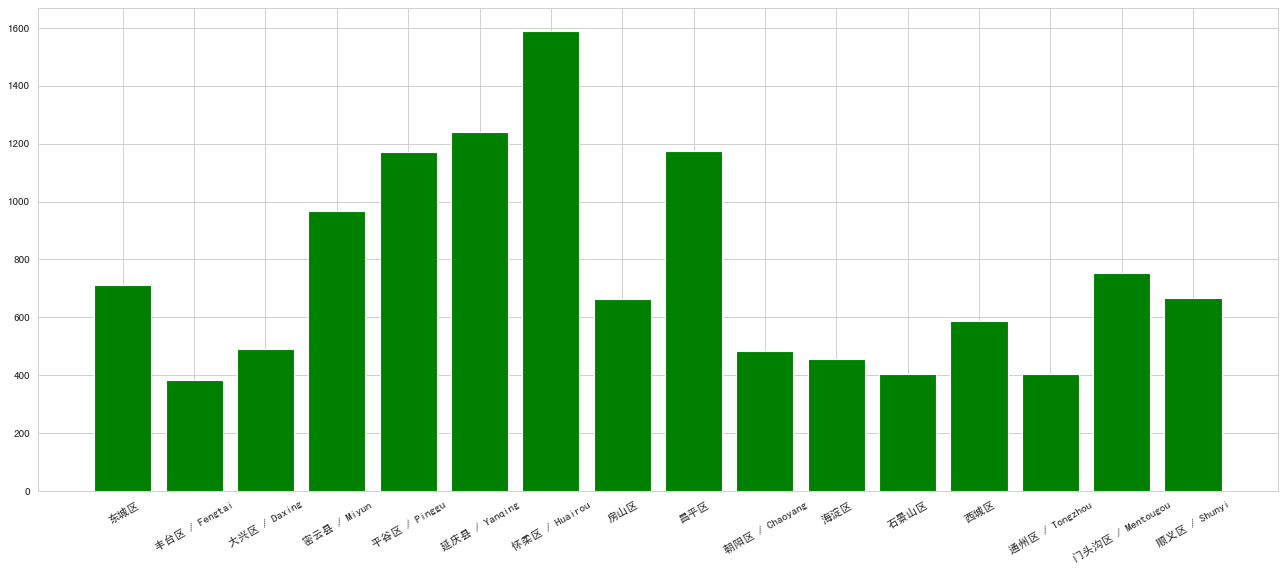

In [182]:
#多变量分析
#查看区域和价格之间的关系
neighbourhood_price=pd.pivot_table(data2,index='neighbourhood',values="price",aggfunc=np.mean)
neighbourhood_price.head()
plt.figure(figsize=(20,8),dpi=80)
plt.bar(neighbourhood_price.index,neighbourhood_price.price,color='g')
plt.xticks(neighbourhood_price.index,neighbourhood_price.index,rotation=30)

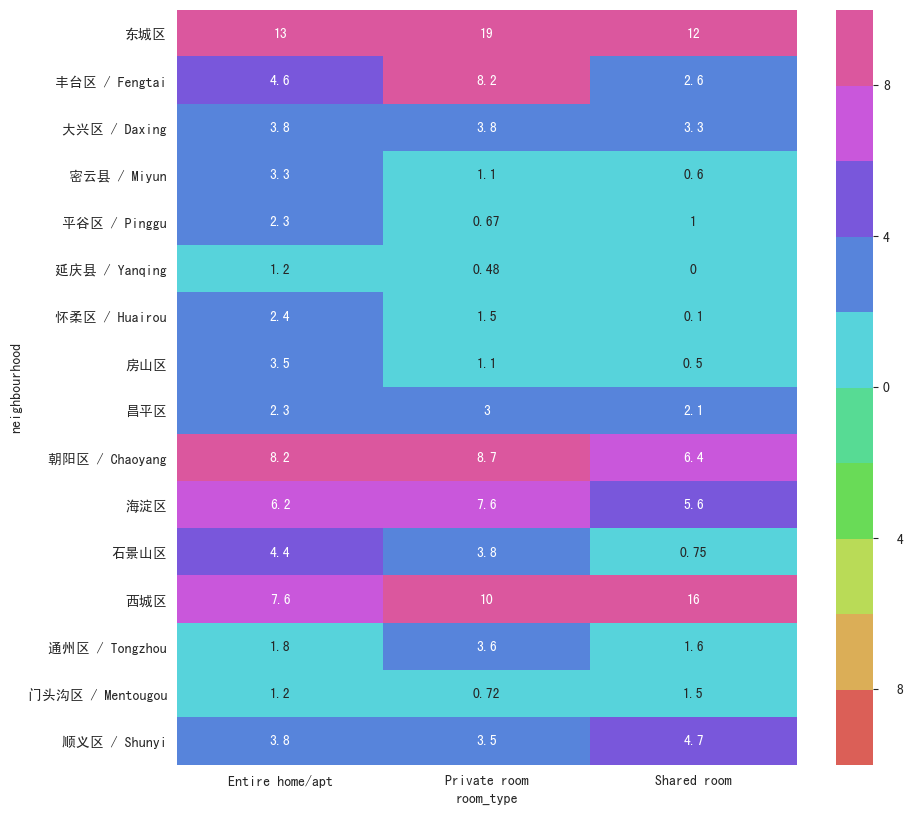

In [194]:
#建立价格、位置、房屋类型、评论数透视图
tables=pd.pivot_table(data2,index='neighbourhood',values=["number_of_reviews","price"],columns="room_type",aggfunc=np.mean)
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(tables.number_of_reviews,vmin=-10,vmax=10,annot=True,cmap=sns.color_palette('hls',n_colors=10))